In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Debug

In [ ]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import load_training_data, save_tiff_imagej_compatible
from csbdeep.models import CARE
import argparse
from random import randint

In [3]:
model = '2019-04-01-planaria_model'
train_data = 'data/Denoising_Planaria/train_data/data_label.npz'
valid_split = 0.2
n_images = 5
axes = 'SCZYX'
       
X_val,Y_val = load_training_data(
    train_data, validation_split=valid_split, axes=axes,
    verbose=True)[1]

# Config is saved during training and automatically loaded when init a CARE
# with config=None
model = CARE(config=None, name=model, basedir='models')

number of training images:	 14320
number of validation images:	 3580
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1
Instructions for updating:
Colocations handled automatically by placer.
Loading network weights from 'weights_best.h5'.


(3580, 16, 64, 64, 1)
(3580, 16, 64, 64, 1)


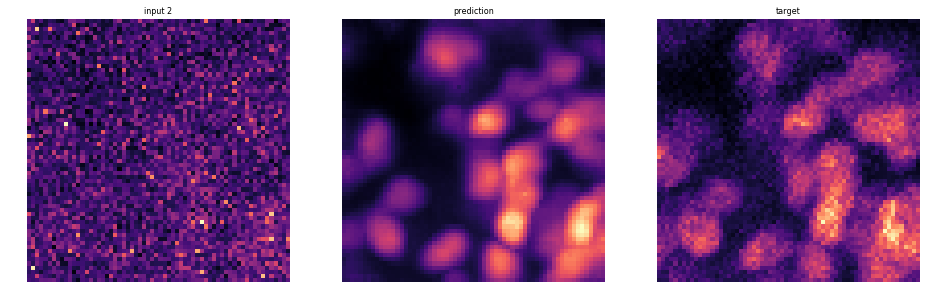

In [12]:
print(X_val.shape)
print(Y_val.shape)

i = 2

y = Y_val[i,...,0]
x = X_val[i,...,0]
axes = 'ZYX'
# axes = 'SCZYX'

# None normalizer is probably wrong, but need to review the authors SI
restored = model.predict_probabilistic(x, axes, normalizer=None)

ims = [[x, restored.mean(), y]]
titles = [['input '+str(i), 'prediction', 'target']]
plt.figure(figsize=(16,10))
plot_some(np.stack(ims), title_list=titles)


# Trained to 100 epochs, 400 steps

number of training images:	 14320
number of validation images:	 3580
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1
Loading network weights from 'weights_best.h5'.


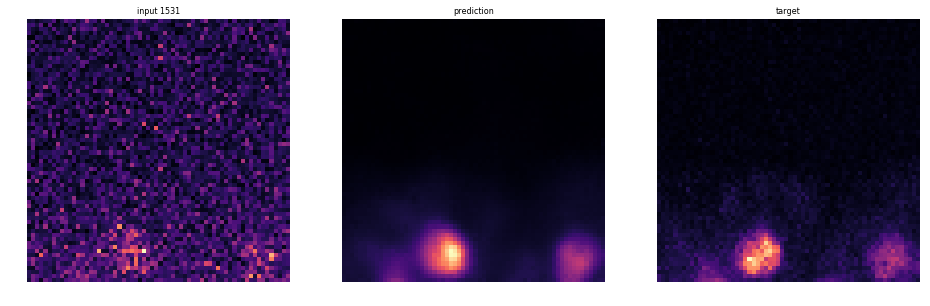

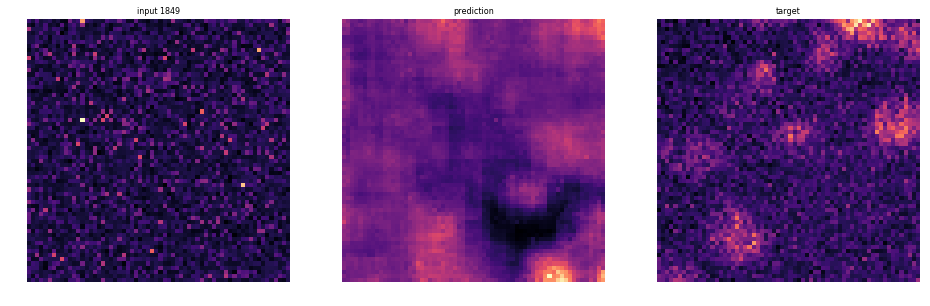

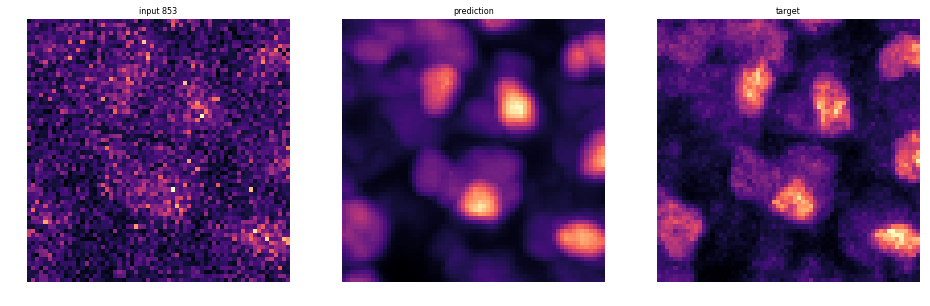

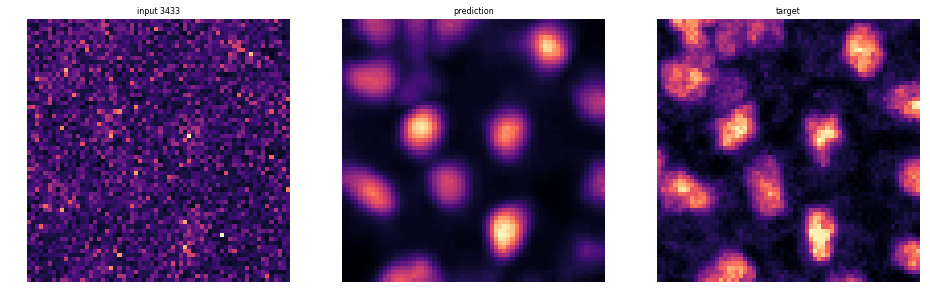

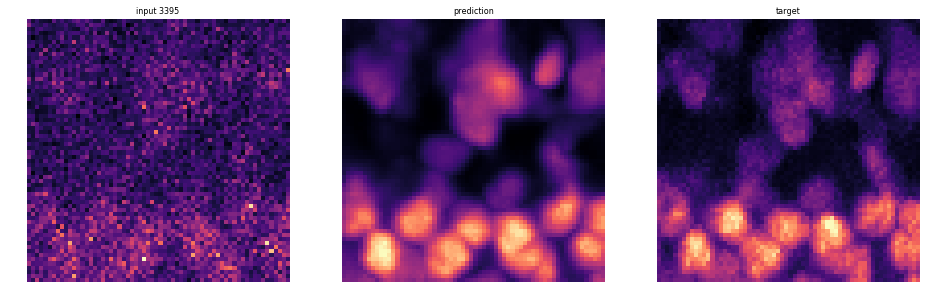

In [13]:
%run '2_prediction.py' '2019-04-01-planaria_model' 'data/Denoising_Planaria/train_data/data_label.npz'

Using TensorFlow backend.


number of training images:	 14320
number of validation images:	 3580
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1
Instructions for updating:
Colocations handled automatically by placer.
Loading network weights from 'weights_best.h5'.


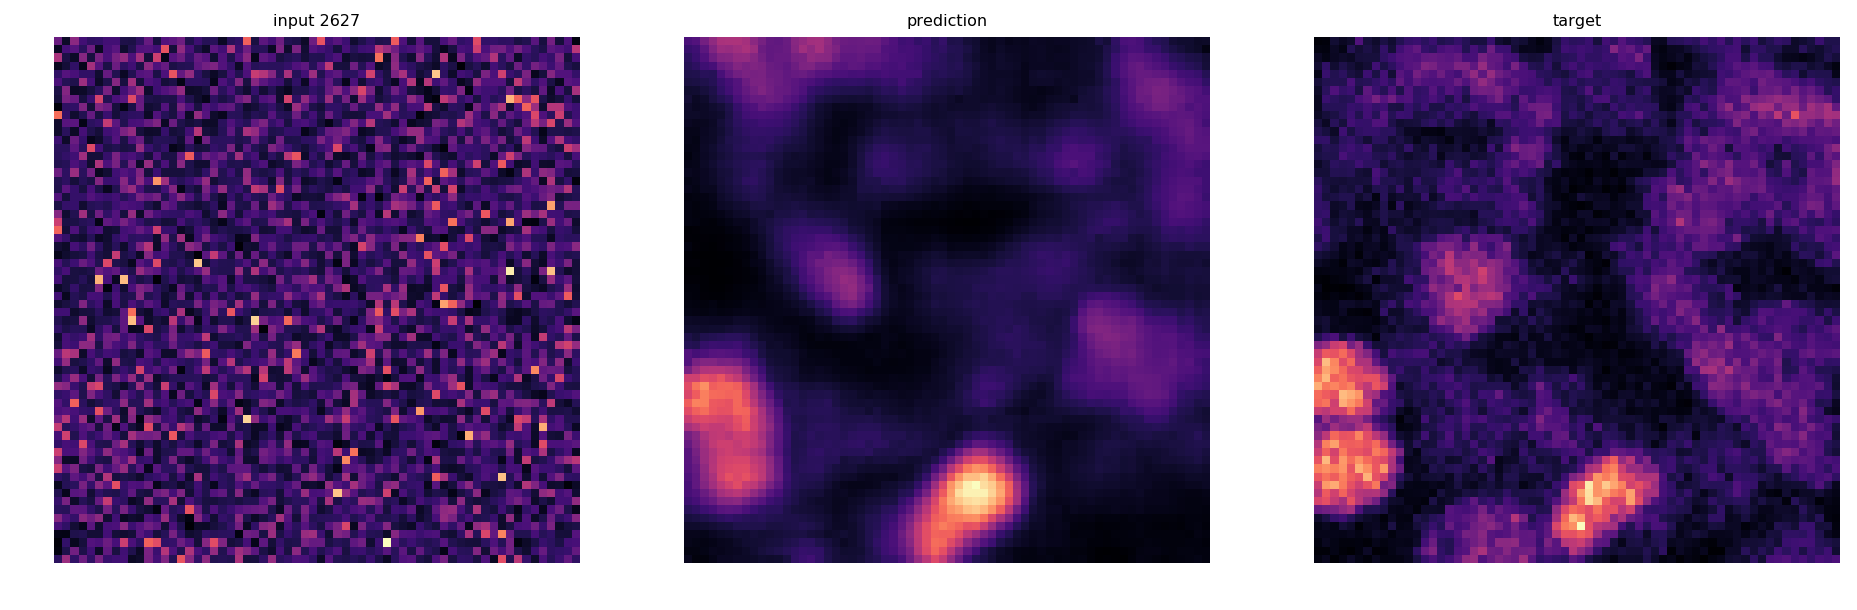

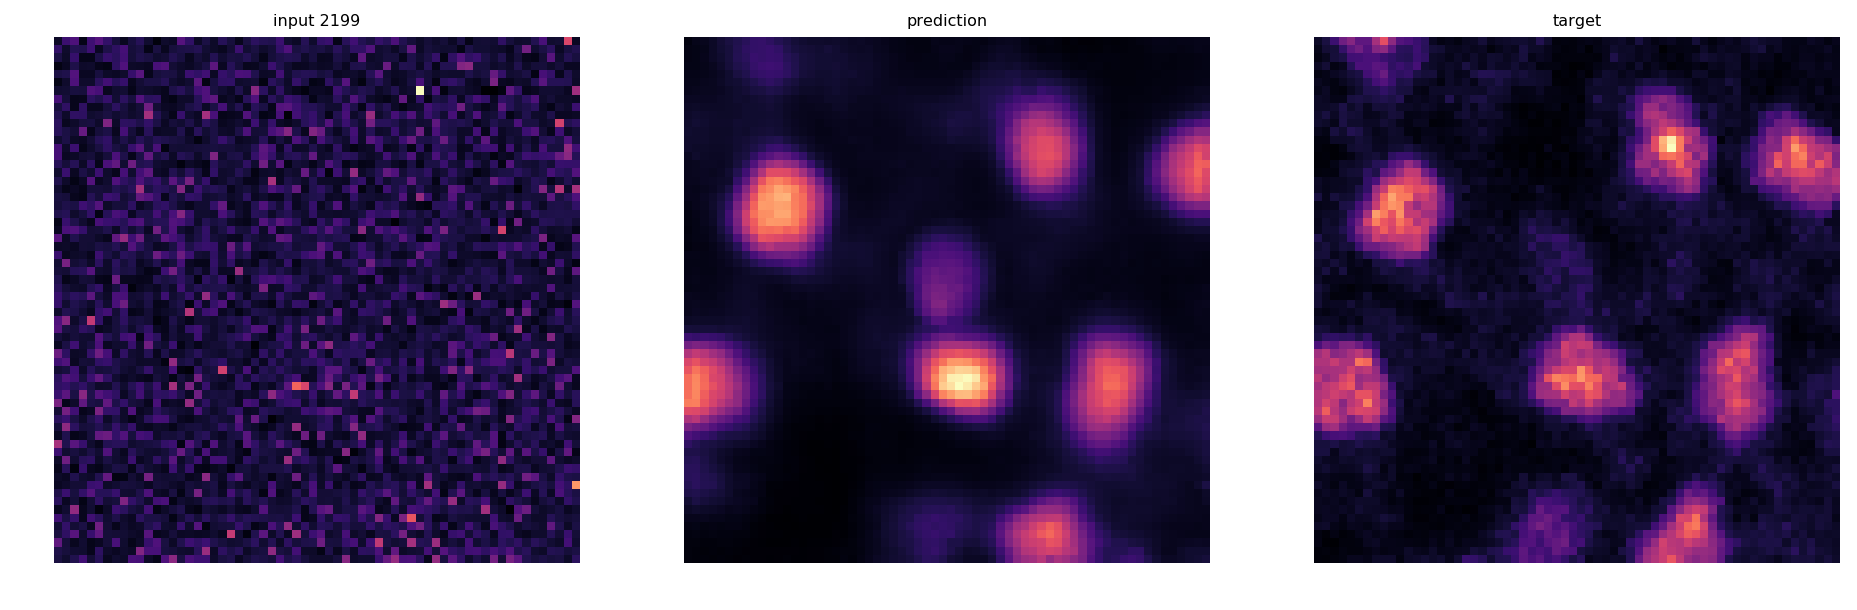

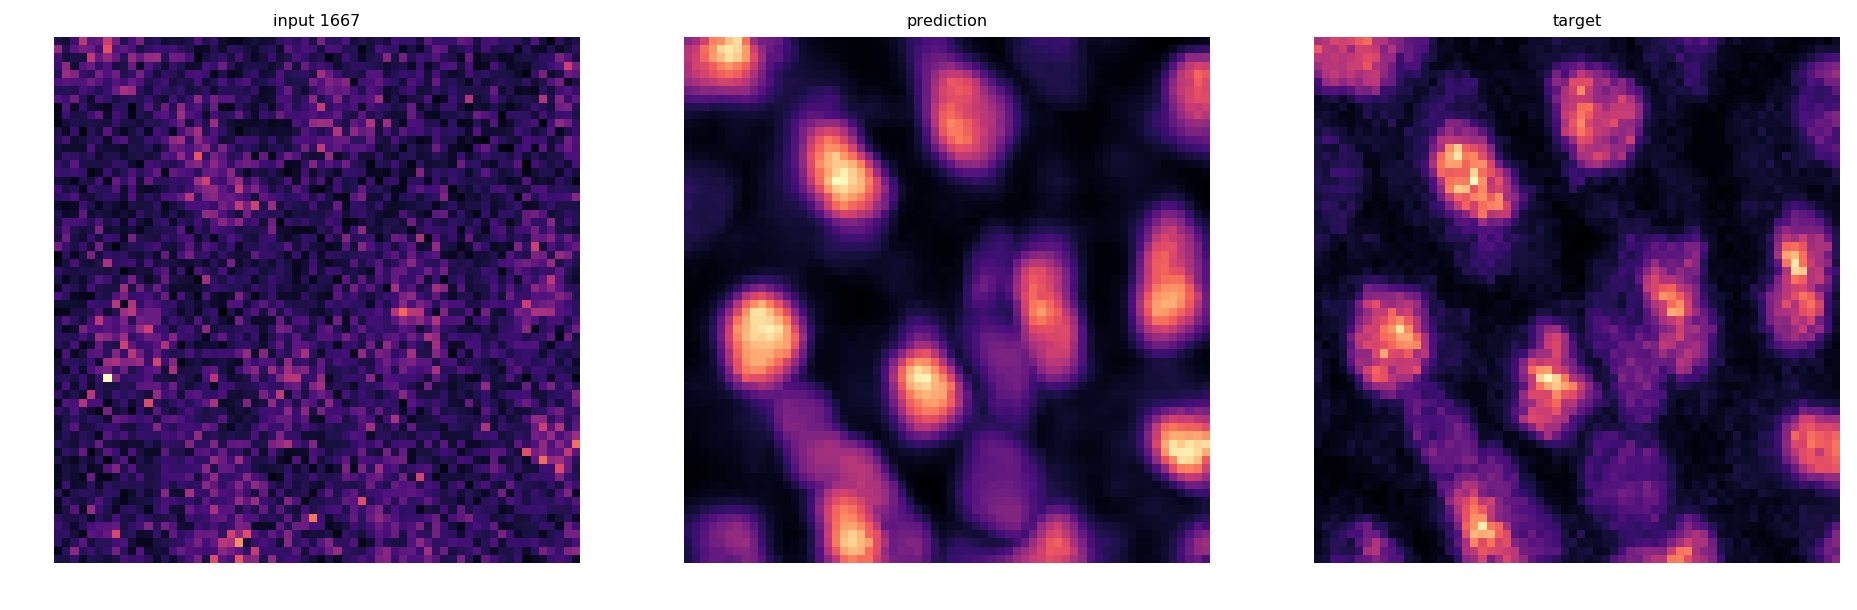

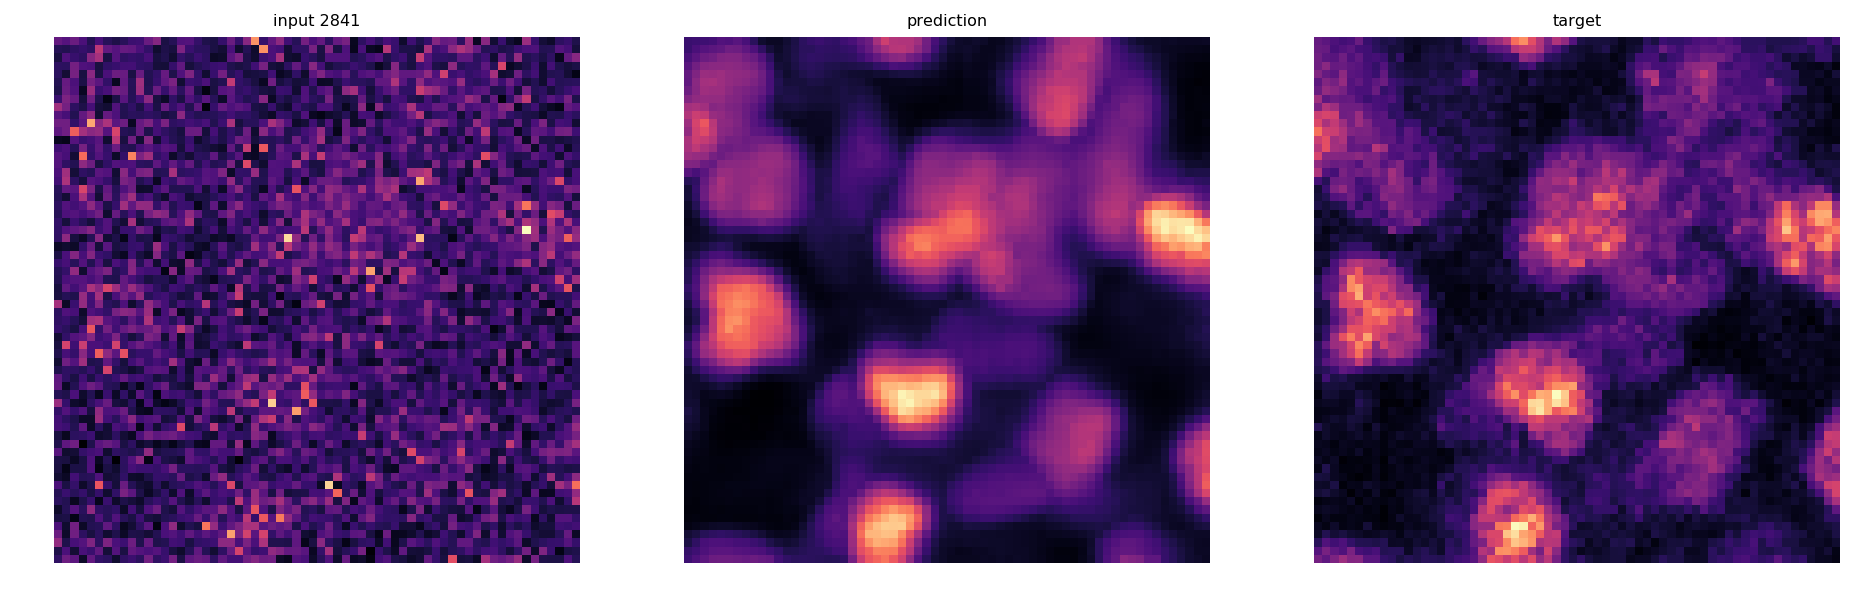

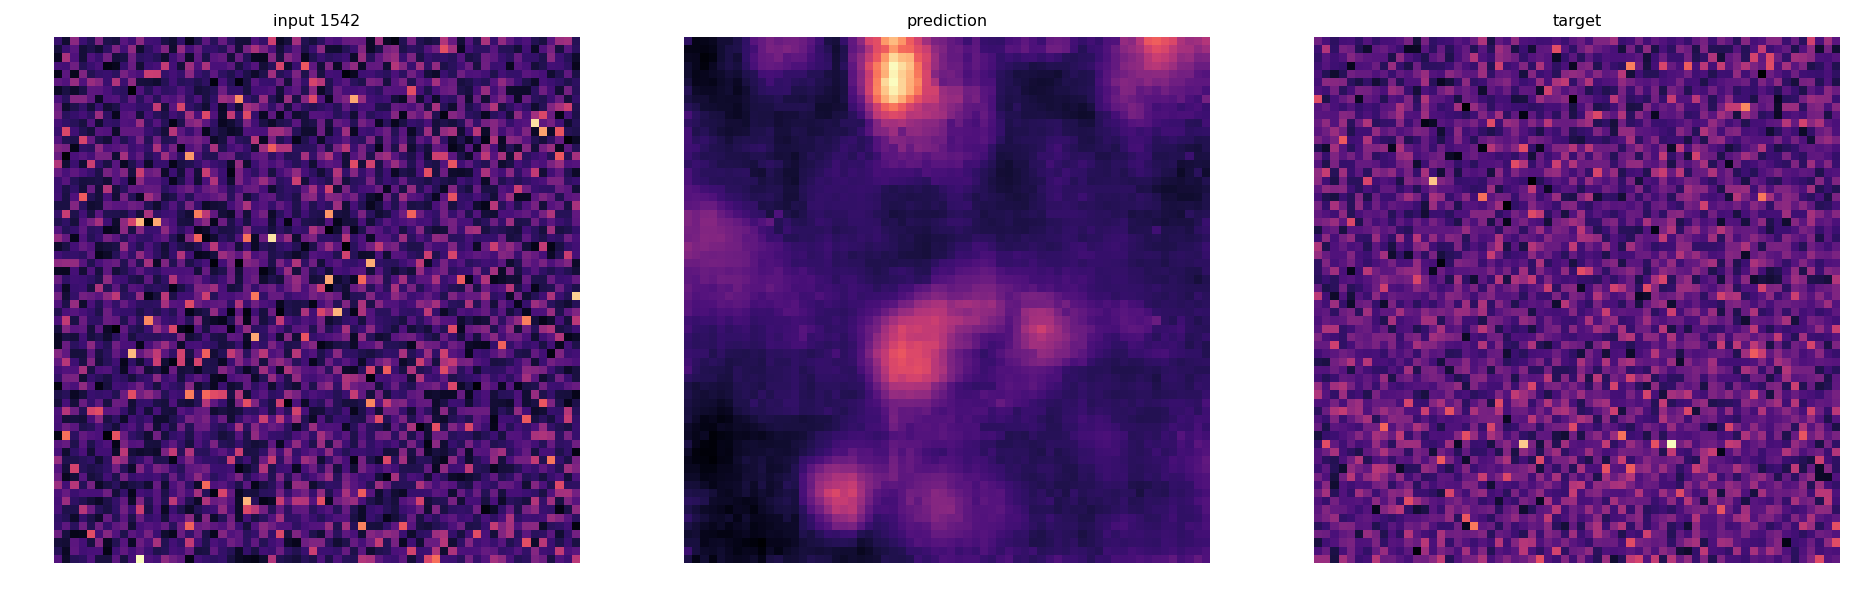

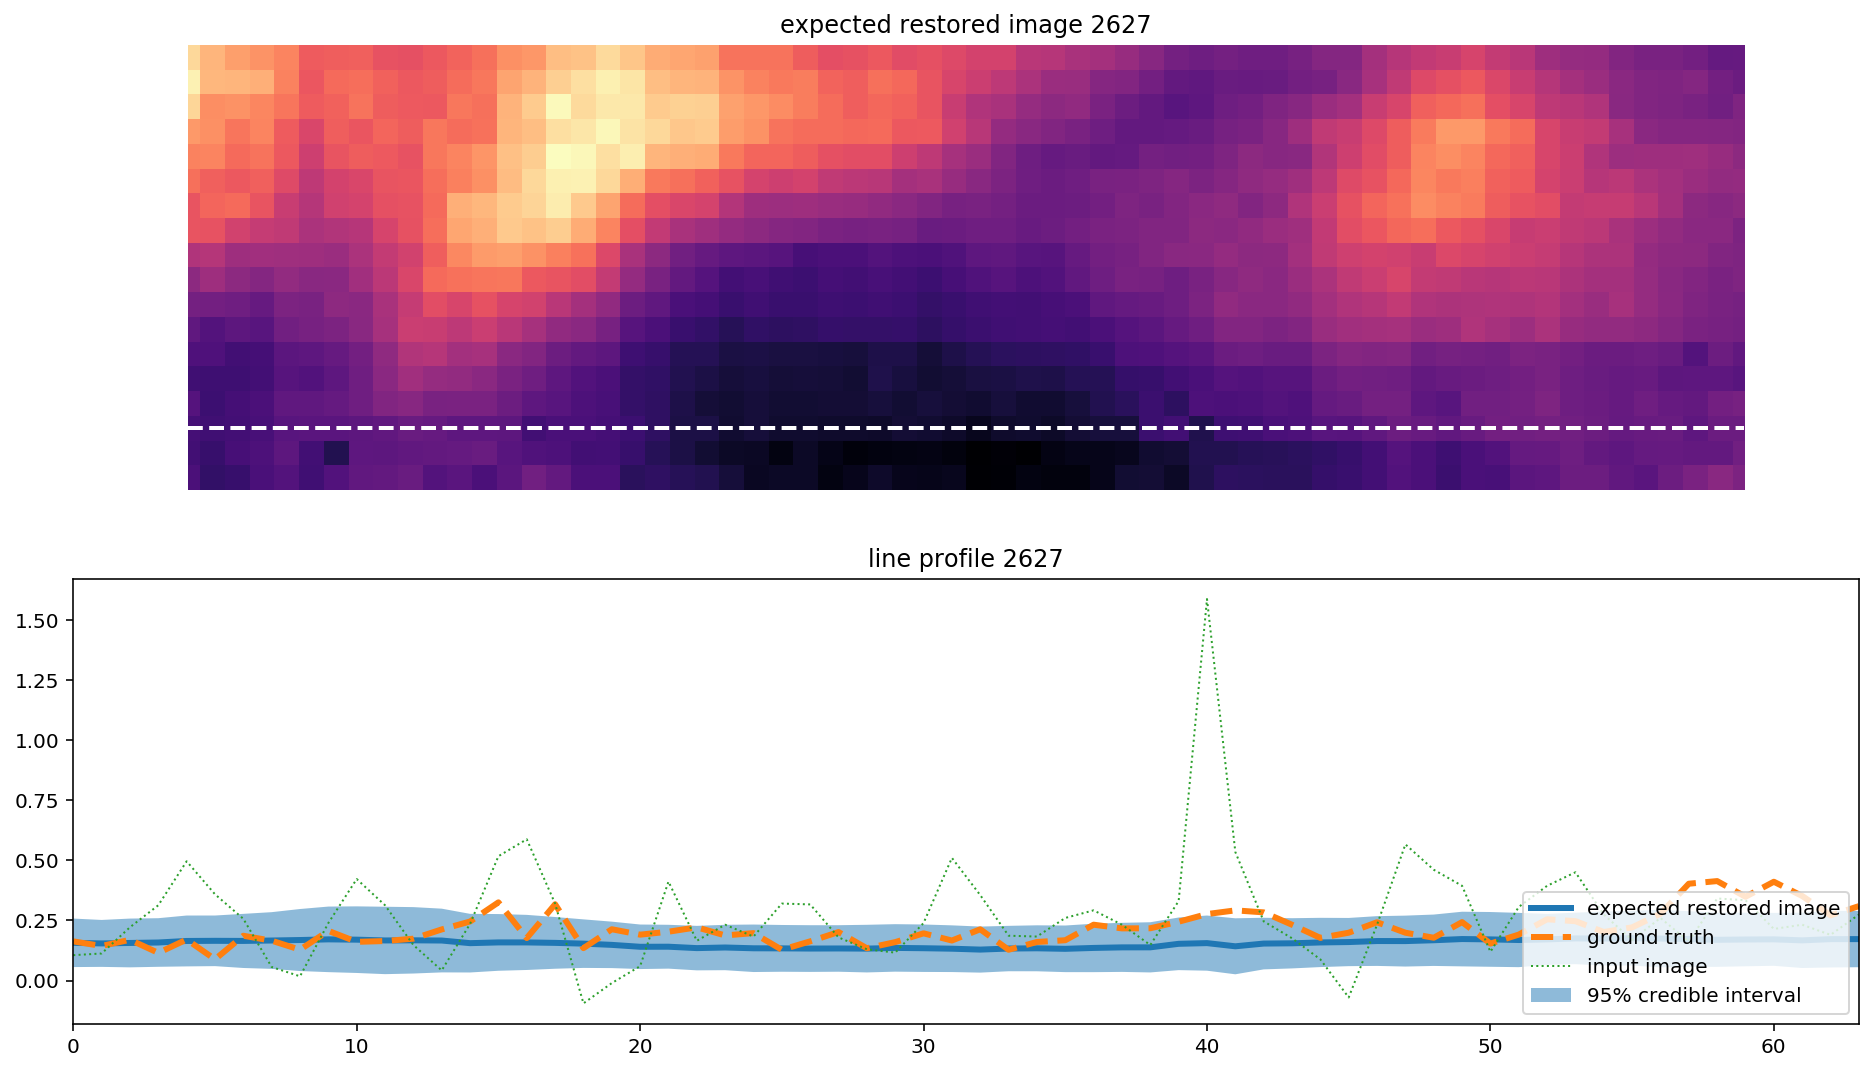

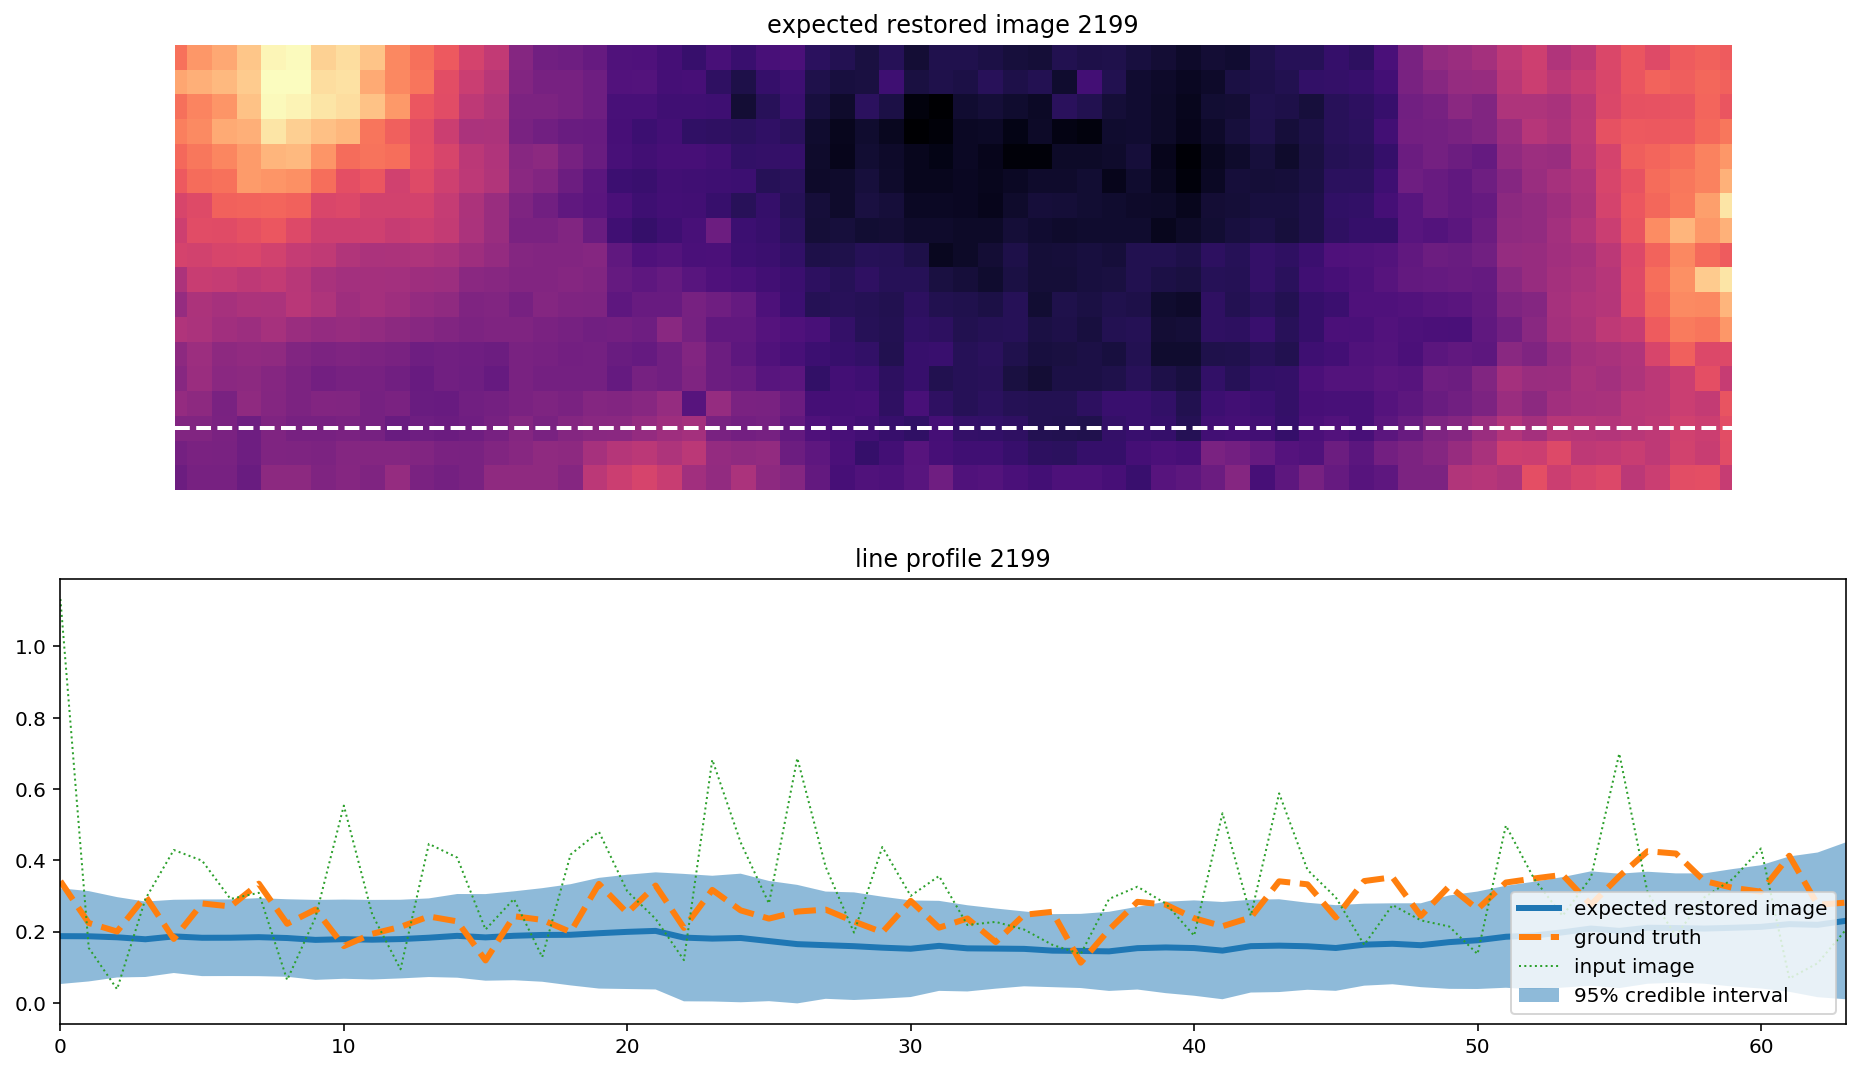

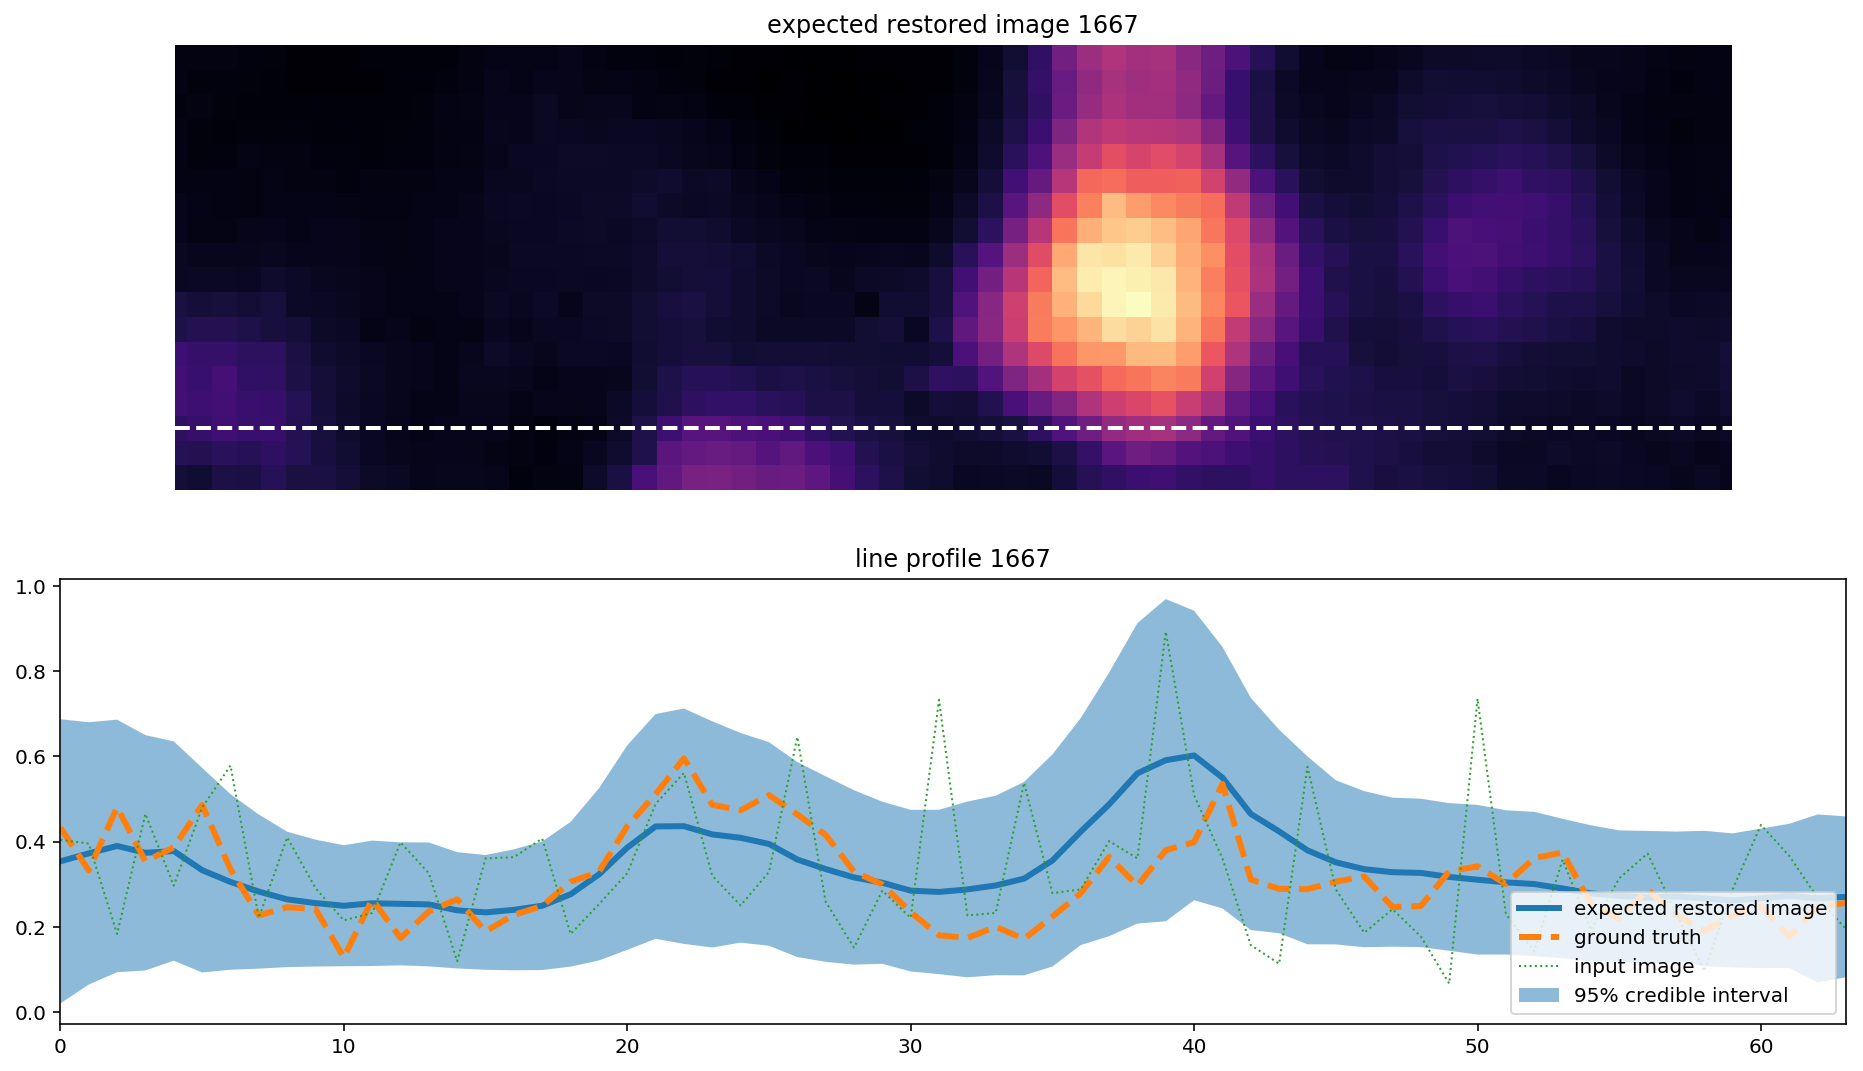

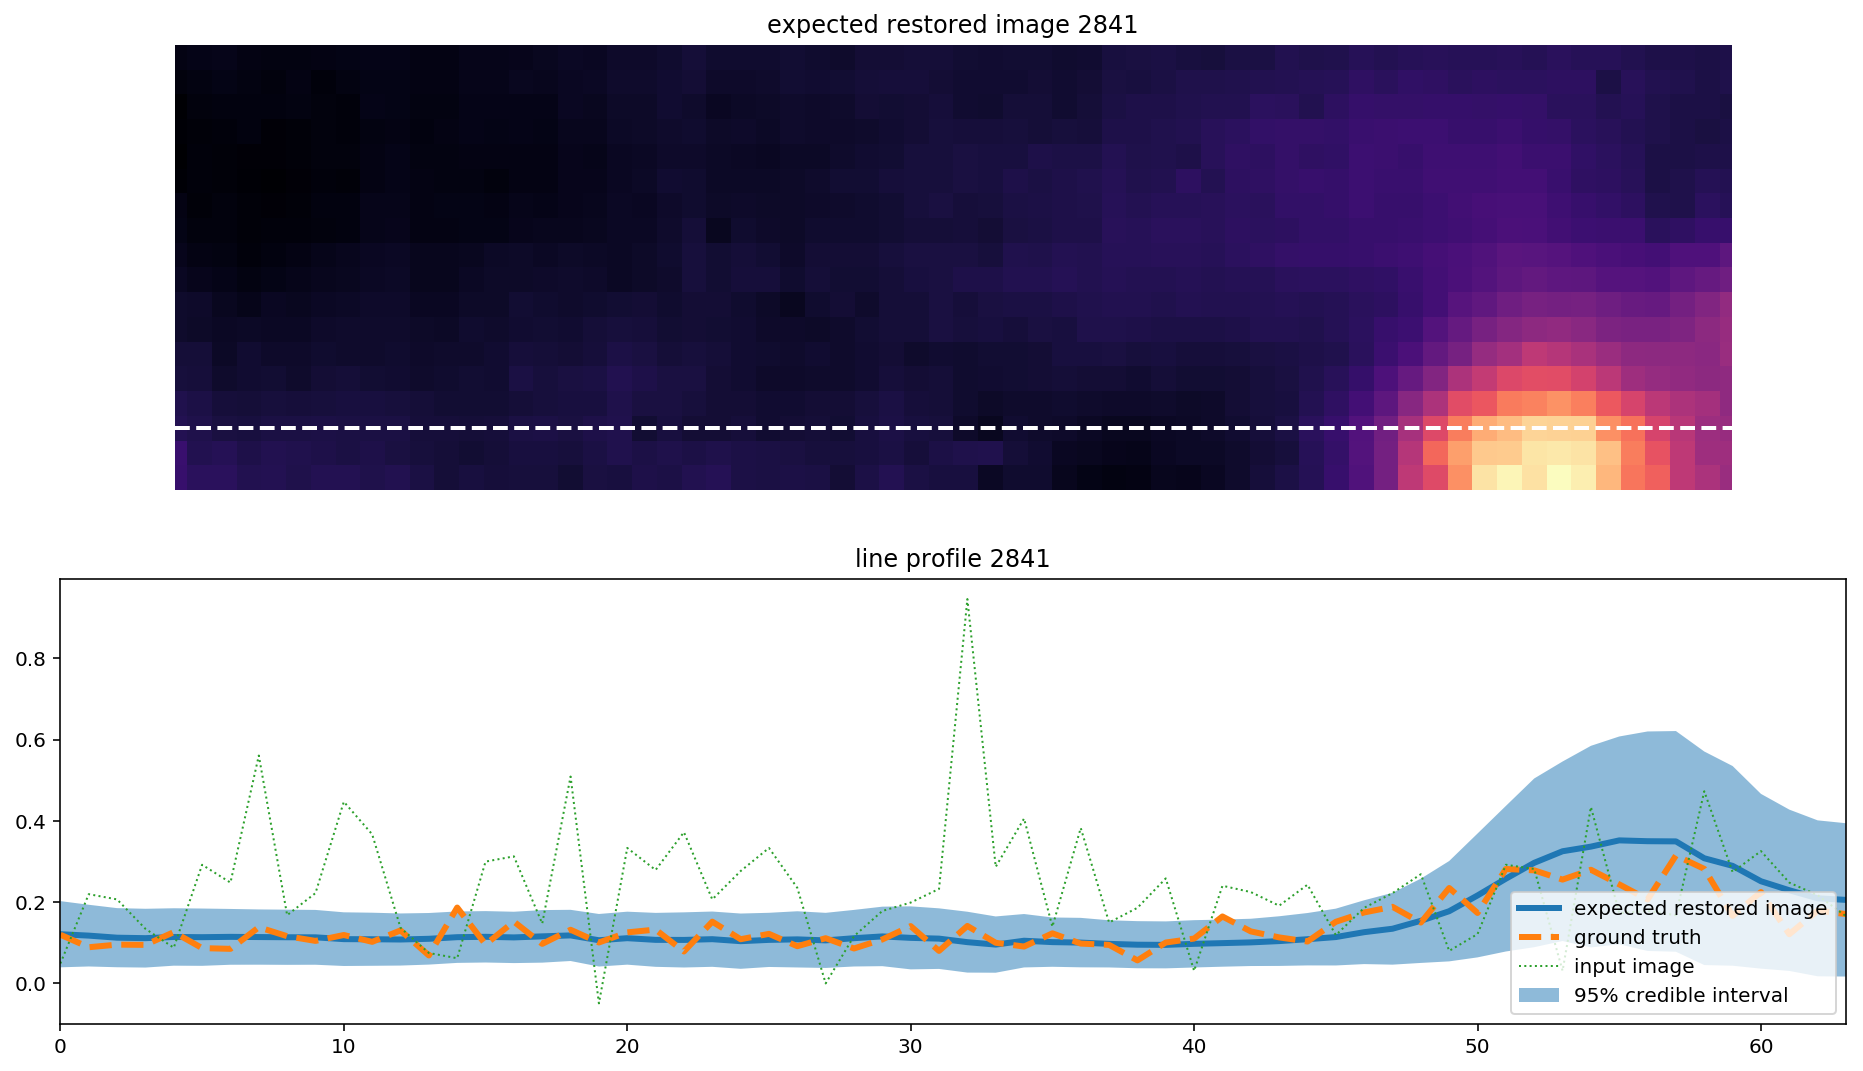

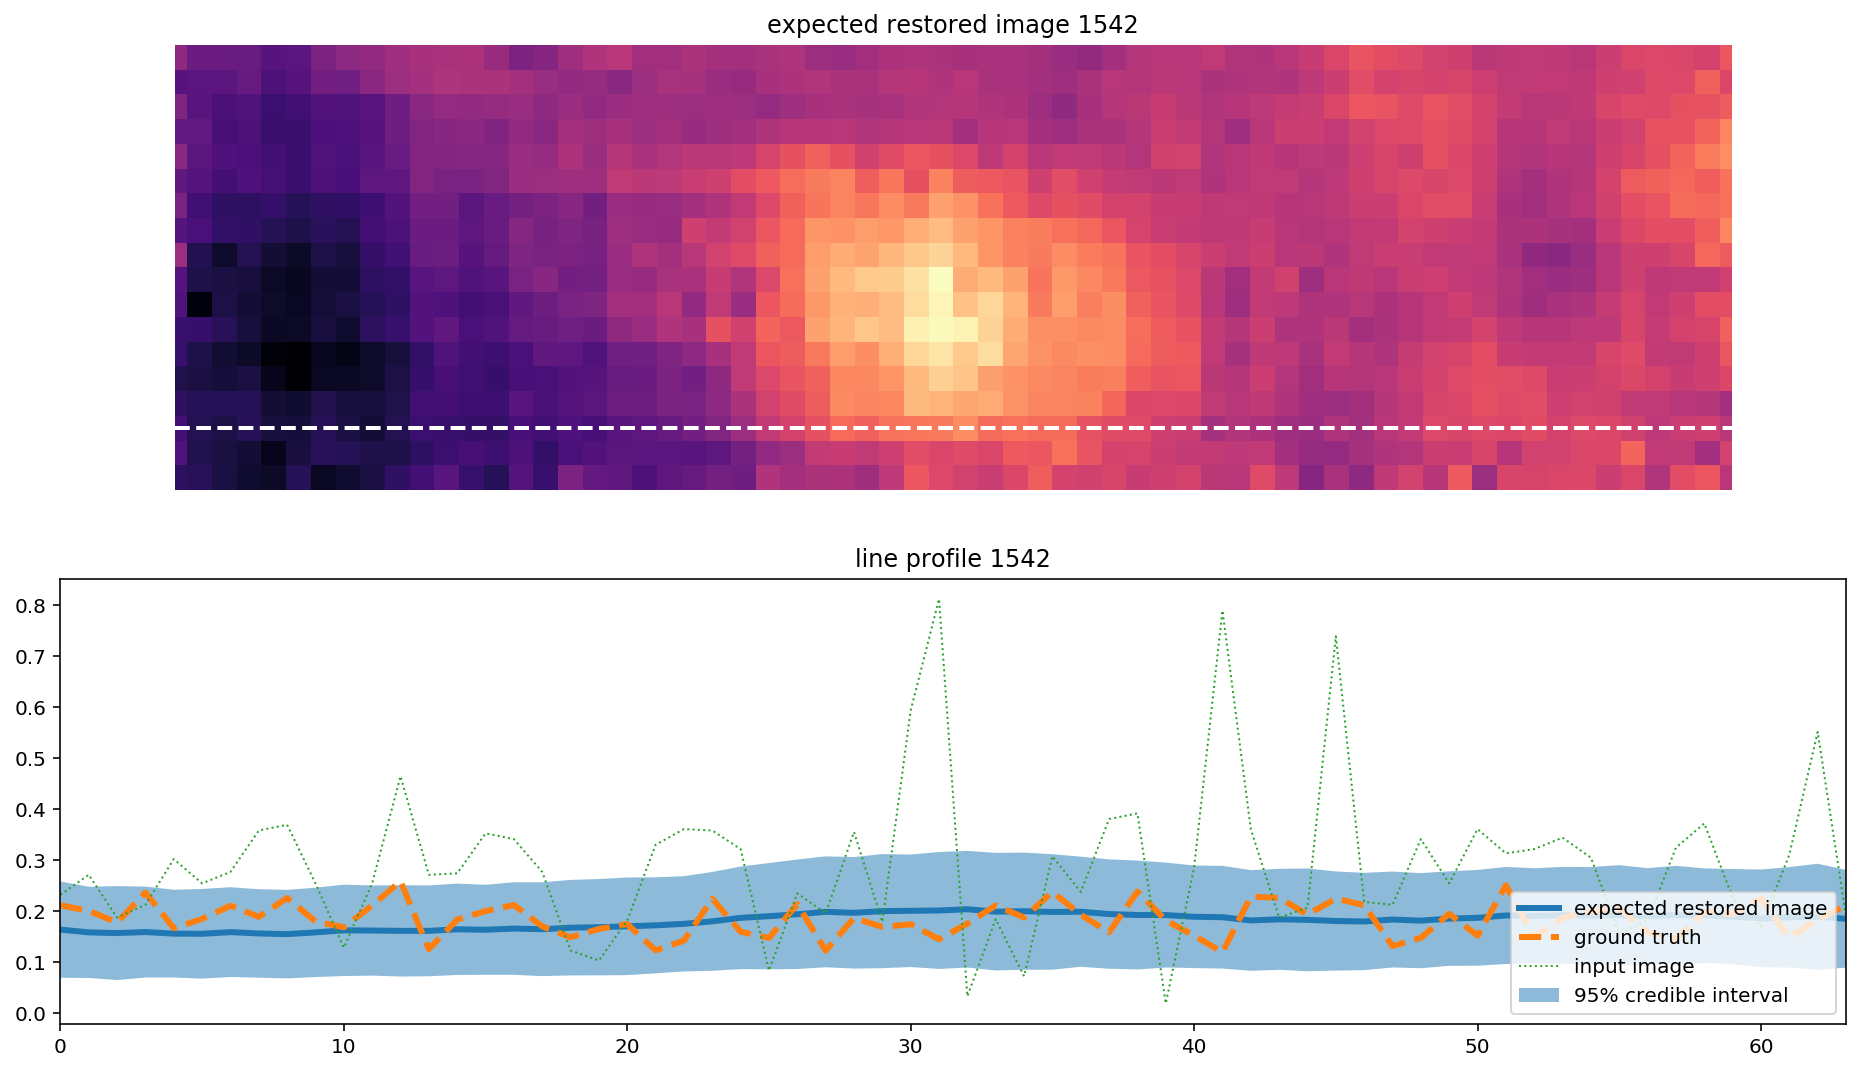

In [2]:
%run '2_prediction.py' '2019-04-01-planaria_model' 'data/Denoising_Planaria/train_data/data_label.npz'